In [1]:
# Importing libraries

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importing sklearn for Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#Loading Boston Housing data from sklearn Library

from sklearn.datasets import load_boston     #Loading the data
boston_dataset = load_boston()

- The Boston Housing dataset contains information about different houses in Boston
- The data was originally a part of UCI Machine Learning Repository but it was removed recently
- The data is pre loaded in the scikit-learn library

In [4]:
#It is not in a structured format
boston_dataset

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [5]:
#Converting it into a pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)      #Creating dataframe
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding the target variable 'Price Value'
boston['MEDV'] = boston_dataset.target

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Metadata - To understand the dataset
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 USD
- PTRATIO - pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's USD (Target Variable)

In [8]:
#Deleting B column
del boston['B']

In [9]:
#Data Pre-processing - Checking null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

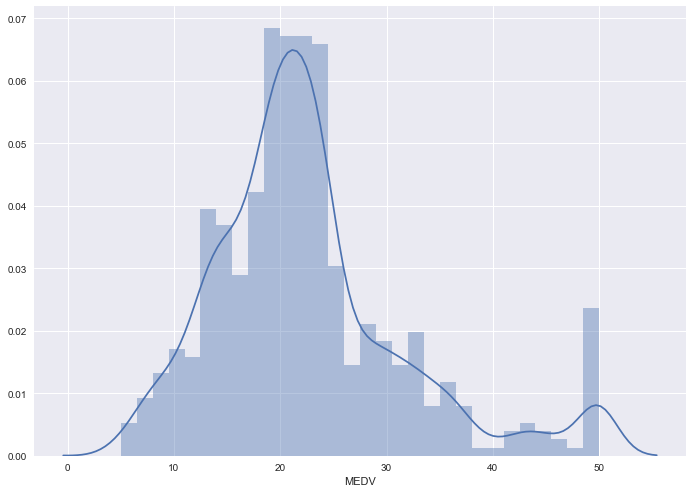

In [10]:
#Distribution of Price

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [11]:
#Fitting the entire data

In [12]:
#To view the columns
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
#Seperating independent and dependent variables for the model
X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
Y = boston['MEDV']

In [14]:
#Splitting the data into 60-40%. 60% training data and 40% test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [15]:
#Fitting Linear Regression Model on Train Data
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#Predictions on Train and Test Data
train_predictions = lm.predict(X_train)
test_predictions = lm.predict(X_test)

In [17]:
#Coefficients of Linear Model

coefficients = pd.DataFrame(lm.coef_, X.columns)        #lm.coef_ is used to get coefficients
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.097608
ZN,0.047410
INDUS,-0.021347
CHAS,1.316296
NOX,-14.769723
RM,3.443773
AGE,-0.012494
DIS,-1.472114
RAD,0.224922
TAX,-0.011959


### Interpreting Coefficients

- For one unit that nox increase, the house value decrease by 14.3 (Negative correlation).
- For one unit that rm increase, the house value increase by 3.67 (Positive correlation).

Text(0,0.5,'Predicted Y Test')

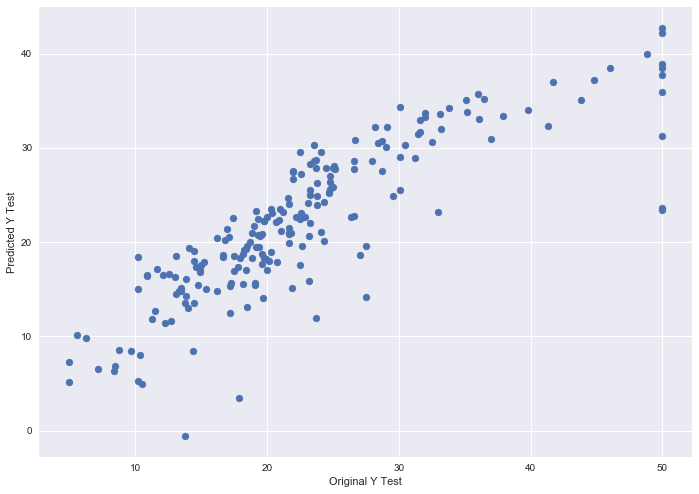

In [18]:
#Scatter Plot for Predicted vs Original Values 
plt.scatter(Y_test, test_predictions)

plt.xlabel('Original Y Test')
plt.ylabel('Predicted Y Test')

In [19]:
# model evaluation for training set
print('MAE:', metrics.mean_absolute_error(Y_train, train_predictions))
print('MSE:', metrics.mean_squared_error(Y_train, train_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, train_predictions)))
print('R2:', r2_score(Y_train, train_predictions))

MAE: 3.197840913263356
MSE: 20.15973012876739
RMSE: 4.489958811477828
R2: 0.735973721552571


In [20]:
# model evaluation for test set
print('MAE:', metrics.mean_absolute_error(Y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(Y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, test_predictions)))
print('R2:', r2_score(Y_test, test_predictions))

MAE: 3.489887057623854
MSE: 27.18011223732673
RMSE: 5.2134549233043845
R2: 0.7177886132605176


---

### Feature Engineering for Big Data

- Domain Knowledge
- Correlation and Multi-Colinearity

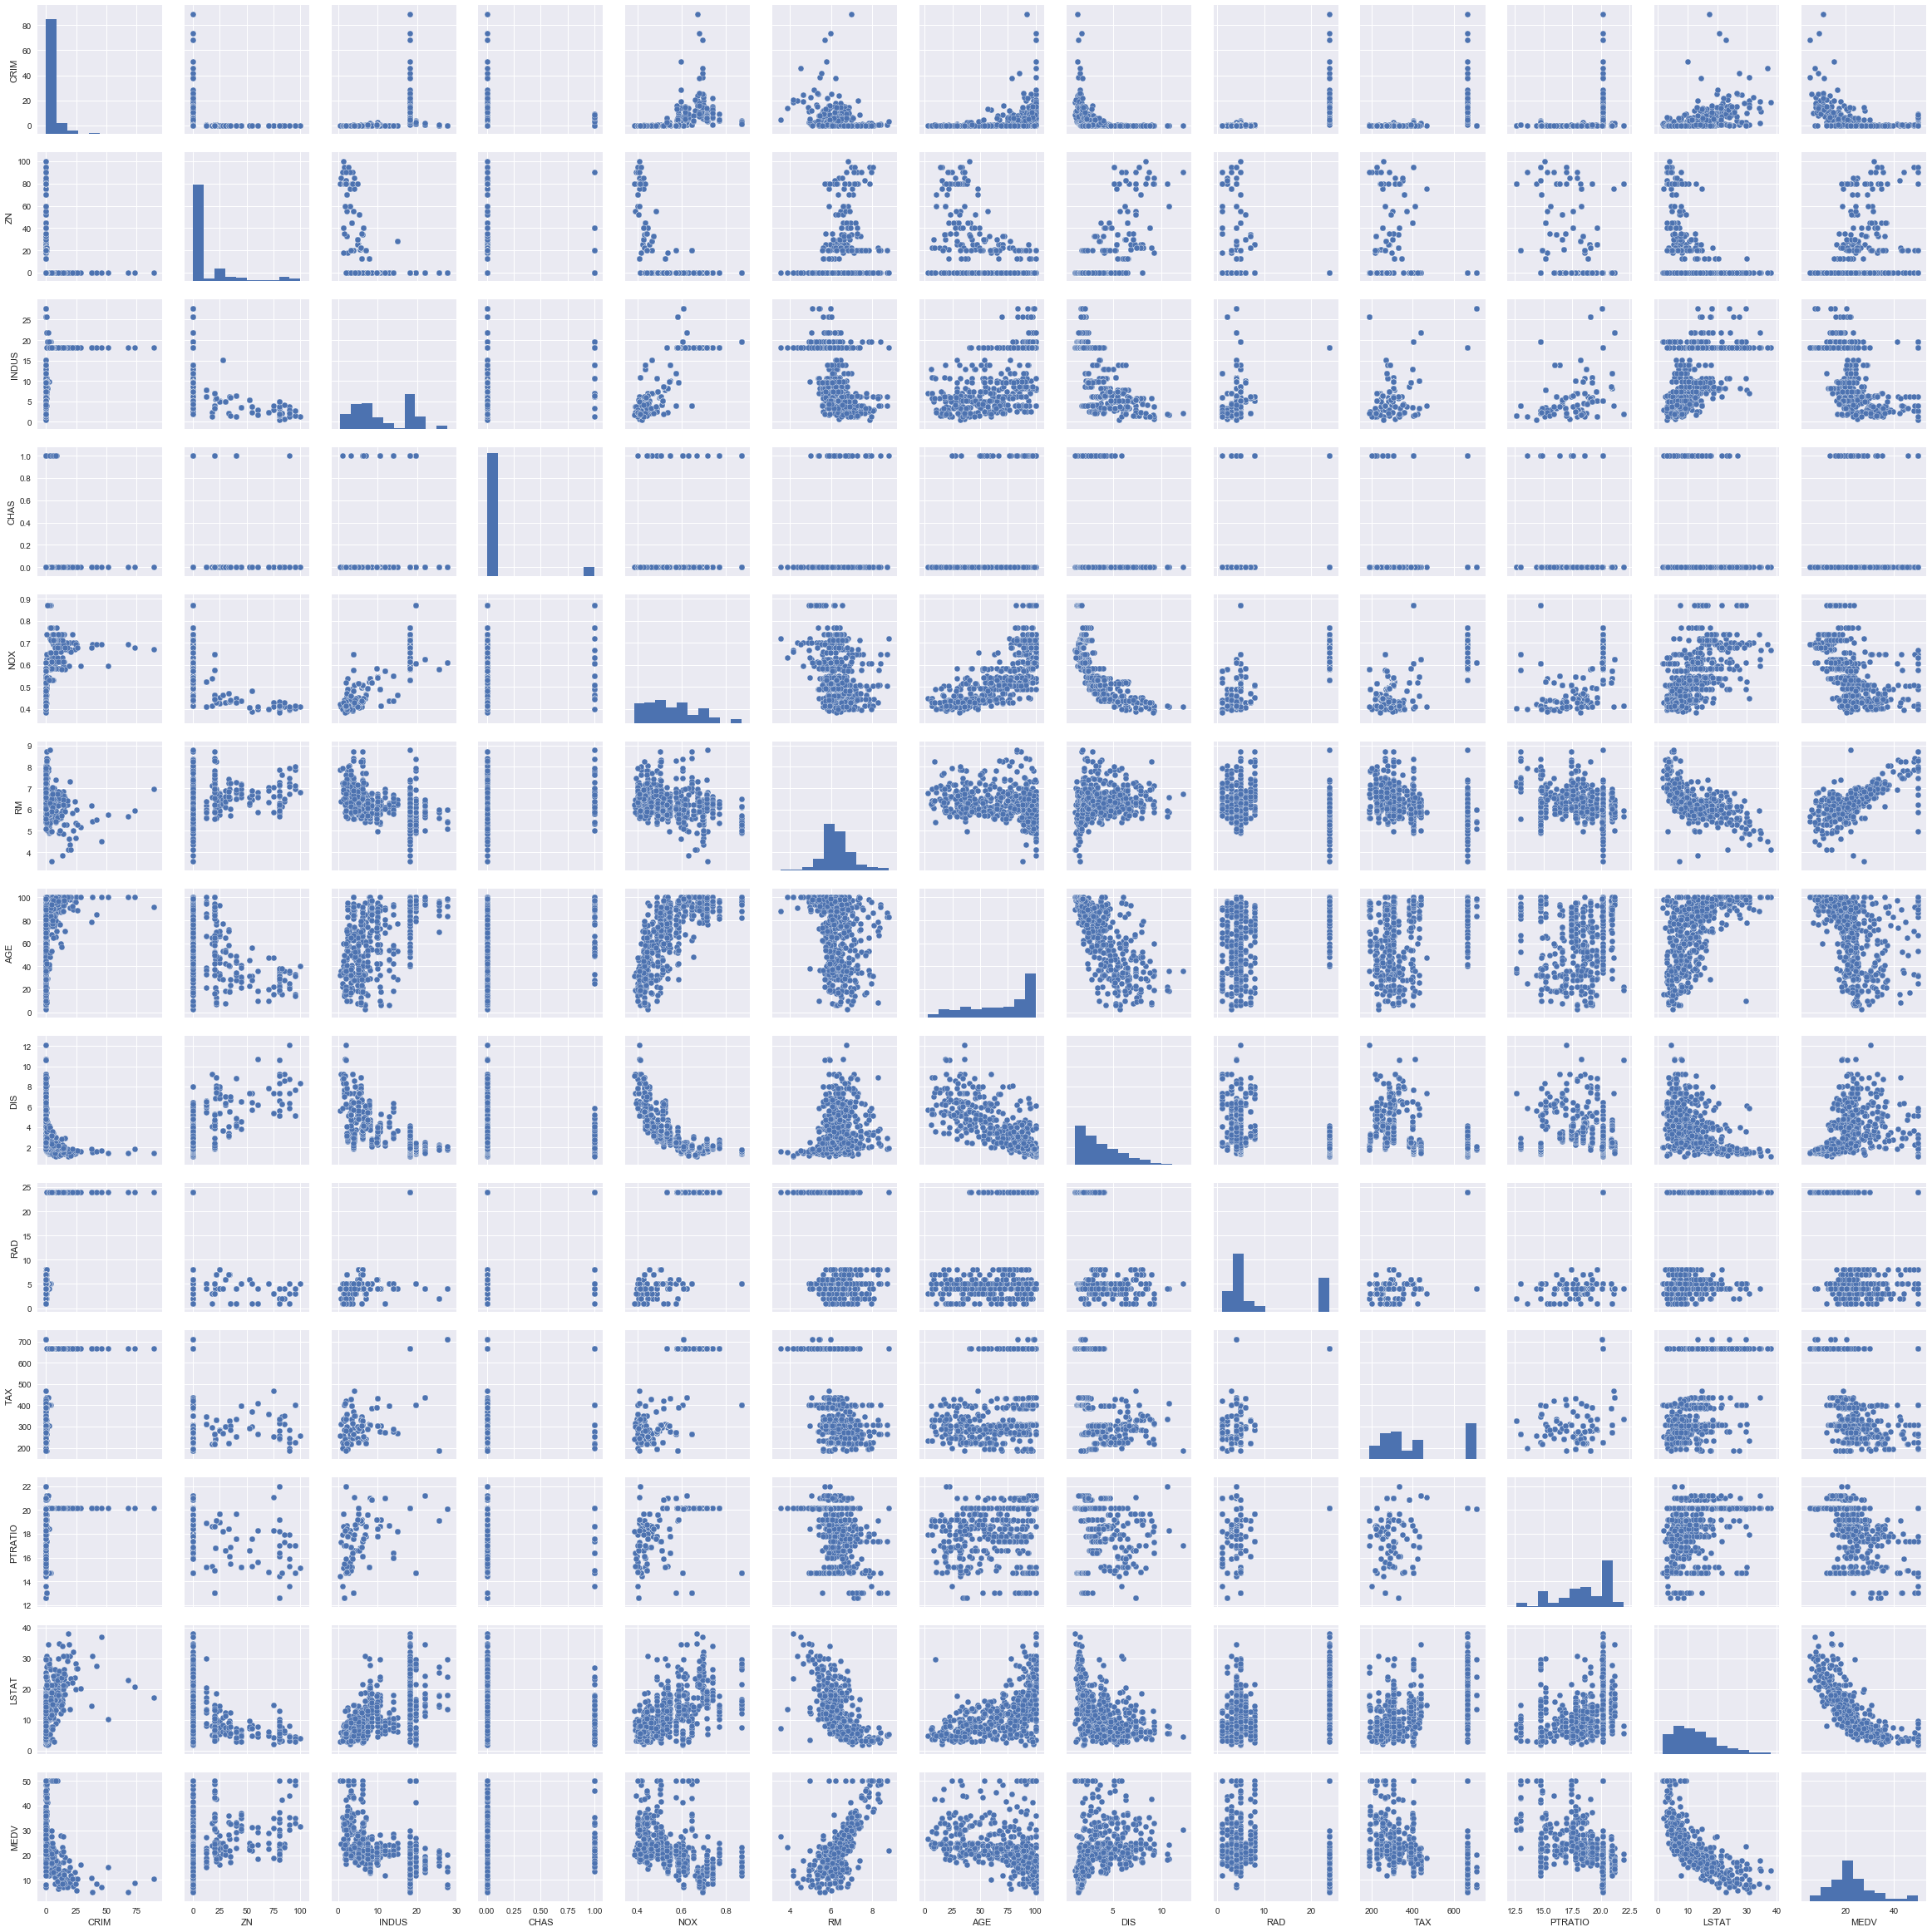

In [21]:
#Pair plot
sns.pairplot(boston, vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'])
plt.show()

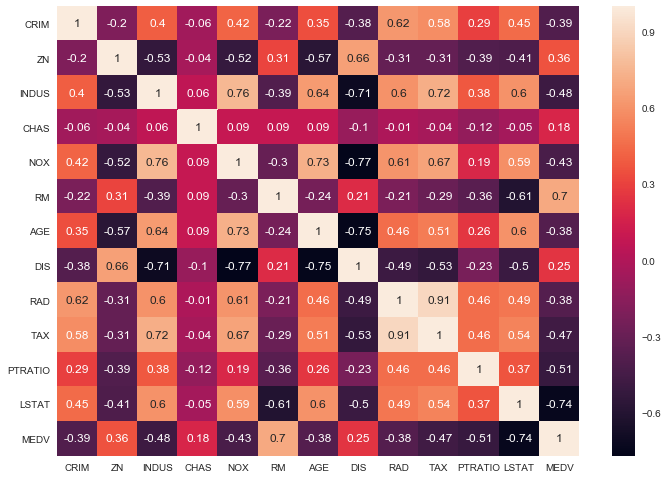

In [22]:
#Correlation Matrix

corr_matrix = boston.corr().round(2)
sns.heatmap(corr_matrix, annot = True) #Annot = True is used to print values inside the square
plt.show()

- The correlation coefficient ranges from -1 to 1.
- If the value is close to 1, it means that there is a strong positive correlation between the two variables.
- When it is close to -1, the variables have a strong negative correlation.

In [23]:
#Choose variables which are highly correlated with our target variable
#Drop one of the variable which has a high correlation between them

---

References:
- https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
- https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression  